In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
%matplotlib inline
from sklearn.cluster import KMeans

In [163]:

data = pd.read_csv('ikea_data.csv')

data.Kommun_name = data.Kommun_name.str.replace('ä', 'a')
data.Kommun_name = data.Kommun_name.str.replace('ö', 'o')
data.Kommun_name = data.Kommun_name.str.replace('å', 'a')
data.Kommun_name = data.Kommun_name.str.replace('Ö', 'O')
data.Kommun_name = data.Kommun_name.str.replace('Ä', 'A')
data.Kommun_name = data.Kommun_name.str.replace('Å', 'A')
data.Kommun_name = data.Kommun_name.str.replace('Ã', 'A')

df.to_csv('ikea_clean.csv')
df = data
df.head()

,Unnamed: 0,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,1,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,2,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,3,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,4,114,2010,Upplands Vasby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,5,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [86]:
#deleting extra column
del df['Unnamed: 0']
del df['Year']
df

,Kommun_code,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,Upplands Vasby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
...,...,...,...,...,...,...,...,...,...,...,...
202,1863,Hallefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0
203,1864,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0
204,1880,Orebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0
205,1881,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0


In [67]:
#Exploring information about dataframe
df.info()
print('Data Description')
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
Kommun_code              207 non-null int64
Kommun_name              207 non-null object
Revenue                  207 non-null int64
Employee                 207 non-null int64
Population               207 non-null int64
Population_University    207 non-null int64
Percent_University       207 non-null float64
Productivity             207 non-null float64
SalesIndex               207 non-null float64
Infrast                  207 non-null int64
Border                   207 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 17.9+ KB
Data Description


,Kommun_code,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334262,0.000000,0.000000
50%,1263.000000,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058490,0.000000,0.000000
max,2583.000000,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


/Users/maxrojas/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


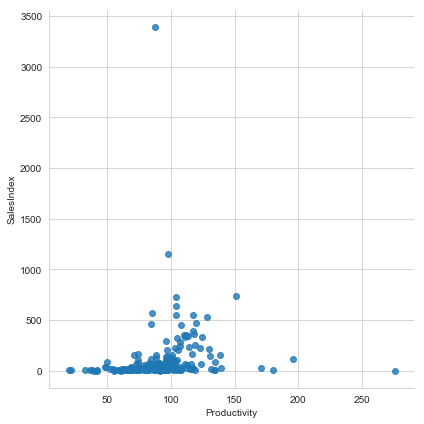

In [68]:
sns.set_style('whitegrid')
sns.lmplot('Productivity','SalesIndex',data=df,
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

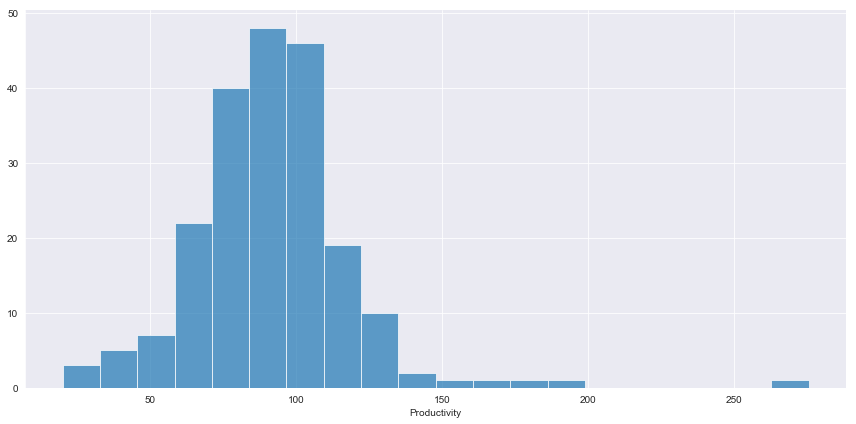

In [54]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Productivity',bins=20,alpha=0.7)

In [71]:
#revenue, productivity and salesindex less than the mean
df2 = df[df['Revenue'] < 1031]
df2 = df2[df2['SalesIndex'] < 106]
df2 = df2[df2['Productivity'] < 91]
df2

,Kommun_code,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
4,115,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
5,117,Osteraker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0
8,125,Ekero,144,116,25410,3893,0.153207,62.21259,14.837580,0,0
11,128,Salem,27,68,15391,1900,0.123449,19.89888,2.782046,0,0
13,138,Tyreso,480,290,42947,5219,0.121522,82.95012,49.458601,0,0
...,...,...,...,...,...,...,...,...,...,...,...
196,1784,Arvika,509,282,26034,2375,0.091227,90.45705,52.446725,0,1
197,1785,Saffle,274,159,15547,1094,0.070367,86.36290,28.232618,0,0
199,1860,Laxa,32,38,5686,271,0.047661,42.20269,3.297240,0,0
202,1863,Hallefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0


In [99]:
#revenue, productivity and salesindex bottom 25% and population > bottom 25%
df3 = df[df['Revenue'] < 110]
df3 = df3[df3['SalesIndex'] < 11]
df3 = df3[df3['Productivity'] < 74]
df3 = df3[df3['Population'] > 10785]
df3

,Kommun_code,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Cluster
11,128,Salem,27,68,15391,1900,0.123449,19.89888,2.782046,0,0,0
25,187,Vaxholm,68,57,10965,1946,0.177474,59.78715,7.006635,0,0,0
39,481,Oxelosund,106,76,11193,787,0.070312,69.89821,10.922108,1,0,0
49,561,Atvidaberg,75,60,11504,794,0.069019,62.64462,7.727906,0,0,0
96,1214,Svalov,45,40,13242,1109,0.083749,56.38016,4.636744,0,0,0
139,1419,Tjorn,90,76,14955,1642,0.109796,59.34753,9.273488,0,0,0
157,1462,Lilla Edet,55,39,12578,775,0.061616,70.67598,5.667131,0,0,0
183,1715,Kil,66,45,11706,1048,0.089527,73.50302,6.800558,0,0,0
187,1761,Hammaro,40,62,14926,2179,0.145987,32.33271,4.121550,0,0,0


In [73]:
df3.describe()

,Kommun_code,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,974.416667,49.416667,45.375000,9323.208333,831.458333,0.083042,54.564377,5.091832,0.041667,0.0
std,593.251096,27.912778,19.673006,3533.333898,565.911191,0.032250,16.417909,2.876098,0.204124,0.0
min,128.000000,11.000000,10.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.0
25%,548.750000,27.750000,35.250000,6588.750000,452.000000,0.059315,41.345450,2.859325,0.000000,0.0
50%,701.500000,43.000000,41.500000,9287.500000,704.500000,0.071993,59.567340,4.430667,0.000000,0.0
75%,1525.250000,69.750000,62.250000,11554.500000,1060.250000,0.097149,67.544140,7.186953,0.000000,0.0
max,1860.000000,106.000000,76.000000,15391.000000,2179.000000,0.177474,73.980310,10.922108,1.000000,0.0


In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [76]:
#Scaling data
mms = MinMaxScaler()
data = df
del data['Kommun_name']
data
mms.fit(data)
data_transformed = mms.transform(data)

In [77]:
data_transformed

array([[1.        , 0.03244542, 0.0145799 , ..., 0.03244542, 0.        ,
        1.        ],
       [0.31024706, 0.11491212, 0.0861491 , ..., 0.11491212, 0.        ,
        0.        ],
       [0.67476711, 0.13832634, 0.10152716, ..., 0.13832634, 0.        ,
        0.        ],
       ...,
       [0.71526934, 0.18904701, 0.15926143, ..., 0.18904701, 0.        ,
        0.        ],
       [0.71567436, 0.00428754, 0.00510828, ..., 0.00428754, 0.        ,
        0.        ],
       [0.71607938, 0.00349693, 0.00335231, ..., 0.00349693, 0.        ,
        0.        ]])

In [78]:
#For each k value, inertia attribute to identify the sum of squared distances of samples.
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

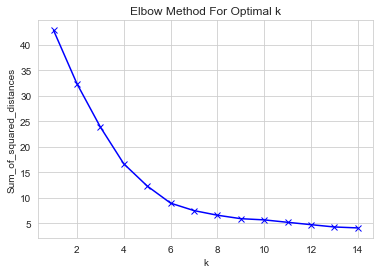

In [79]:
#elbow method
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [157]:
#5 neighborhoods given previous graph
kmeans=KMeans(n_clusters=6)

In [158]:
#Creating array for kmeans purpose
dfk = df
del dfk['Kommun_name']
dfk = np.array(dfk)
dfk

array([[1.00000000e+00, 2.58300000e+03, 2.01000000e+03, ...,
        1.11075774e+02, 0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 8.80000000e+02, 2.01000000e+03, ...,
        3.90516869e+02, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.78000000e+03, 2.01000000e+03, ...,
        4.69856708e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.05000000e+02, 1.88000000e+03, 2.01000000e+03, ...,
        6.41725346e+02, 0.00000000e+00, 0.00000000e+00],
       [2.06000000e+02, 1.88100000e+03, 2.01000000e+03, ...,
        1.56618900e+01, 0.00000000e+00, 0.00000000e+00],
       [2.07000000e+02, 1.88200000e+03, 2.01000000e+03, ...,
        1.29828830e+01, 0.00000000e+00, 0.00000000e+00]])

In [159]:
#Kmeans Model
kmeans = KMeans(n_clusters=6)
kmeans.fit(dfk)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [160]:
#centroids values
print(kmeans.cluster_centers_)

[[1.16319672e+02 1.16869672e+03 2.01000000e+03 1.96975410e+02
  1.13409836e+02 1.20893197e+04 9.93024590e+02 7.86252712e-02
  8.65928768e+01 2.02961003e+01 2.45901639e-02 5.73770492e-02]
 [1.18000000e+02 1.28000000e+03 2.01000000e+03 1.12170000e+04
  5.74000000e+03 2.98963000e+05 5.00840000e+04 1.67525750e-01
  9.79351500e+01 1.15578568e+03 1.00000000e+00 0.00000000e+00]
 [2.00000000e+01 1.80000000e+02 2.01000000e+03 3.28970000e+04
  1.87950000e+04 8.47073000e+05 1.91585000e+05 2.26172950e-01
  8.77178000e+01 3.38966582e+03 1.00000000e+00 0.00000000e+00]
 [6.29047619e+01 7.51142857e+02 2.01000000e+03 2.97385714e+03
  1.31204762e+03 7.68641429e+04 1.06194762e+04 1.40120126e-01
  1.11389230e+02 3.06422528e+02 4.76190476e-02 1.38777878e-17]
 [9.30000000e+01 9.52142857e+02 2.01000000e+03 5.33142857e+03
  2.66528571e+03 1.39537143e+05 2.32741429e+04 1.65877021e-01
  1.01437599e+02 5.49343745e+02 1.42857143e-01 0.00000000e+00]
 [9.50363636e+01 9.23909091e+02 2.01000000e+03 8.30309091e+02
  4

In [161]:
print(kmeans.labels_)

[0 3 3 5 5 5 5 3 5 3 3 0 3 5 5 0 3 5 3 2 3 3 5 3 5 0 5 5 5 0 0 0 0 4 5 0 0
 0 5 0 0 5 3 5 0 0 0 0 0 0 0 0 4 4 0 5 0 5 0 0 0 0 5 0 4 5 5 0 5 0 0 0 0 0
 0 0 0 3 5 0 0 0 0 0 0 0 5 5 0 0 3 0 3 5 5 0 0 0 0 5 0 0 0 5 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 4 5 4 5 5 5 5 3 0 5 5 0 3 0 5 3 3 5 5 0 5 0 0 0 0 0 0 0 5 5
 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 3 5 0 5 0 5 5 5 3 0 0 5 5 0 5 0 0 5 0 0
 0 0 0 0 0 0 0 0 5 0 0 5 0 0 0 0 0 0 0 4 0 0]


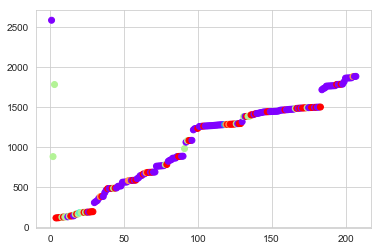

In [162]:
plt.scatter(dfk[:,0],dfk[:,1], c=kmeans.labels_, cmap='rainbow')